In [427]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mat

In [428]:
data = pd.read_csv('assessment_data.csv')

In [429]:
#data cleaning

In [430]:
#viewing first five records
data.head()

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,bigollo-16,blue,29.0000,1,sigma,112.877941
1,1,151.5500,2,1,cantor-33,pink,0.9167,1,sigma,60.291423
2,0,151.5500,2,1,cantor-33,blue,2.0000,1,sigma,143.794103
3,0,151.5500,2,1,cantor-33,pink,30.0000,1,sigma,131.278352
4,0,151.5500,2,1,cantor-33,blue,25.0000,1,sigma,204.415716


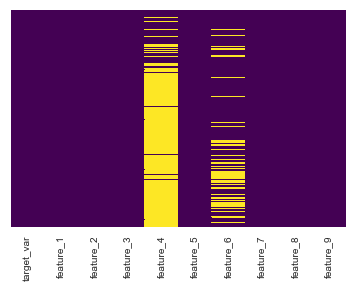

In [431]:
# checking for null values in the dataset
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [432]:
# Getting calcutions

data[['feature_1','feature_6', 'feature_9']].describe()

,feature_1,feature_6,feature_9
count,1308.000000,1046.000000,1309.000000
mean,33.295479,29.881135,101.794120
std,51.758668,14.413500,50.890853
min,0.000000,0.166700,-93.974333
25%,7.895800,21.000000,68.550768
50%,14.454200,28.000000,102.039185
75%,31.275000,39.000000,135.175053
max,512.329200,80.000000,264.692290


In [433]:
#deleting feature_4 because it has so many null values
data.drop('feature_4', axis=1, inplace= True)

In [434]:
#This is the results we get after droping the column, and since the Nulls on columns feature_6 and feature_8 I am just 
# going to let them be for now

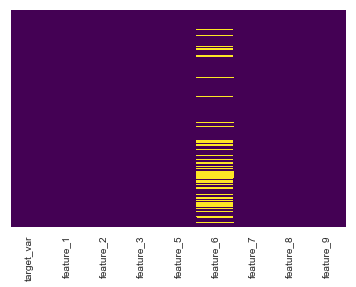

In [435]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [436]:
#filling each null value within feature_6 column to replace all the null values
data['feature_6'] = data['feature_6'].fillna(value = 0)

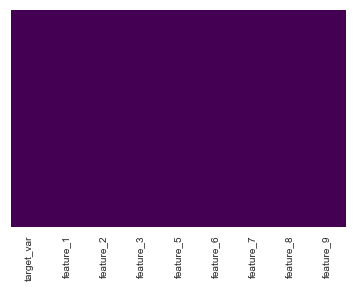

In [437]:
#now the data is clean
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

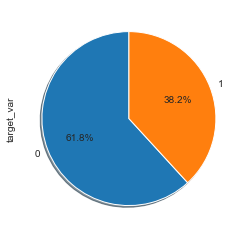

In [438]:
#Target value counts.
data['target_var'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

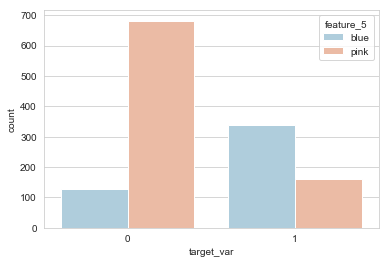

In [439]:
#checking counts for items from feature 5 in the binary expression of target_var
sns.set_style('whitegrid')
sns.countplot(x='target_var',hue='feature_5',data=data,palette='RdBu_r')

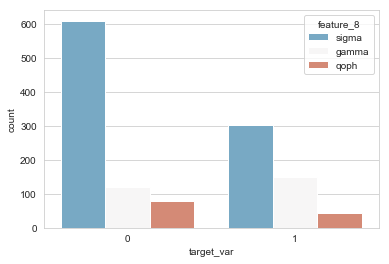

In [440]:
#checking counts for items from feature 8 in the binary expression of target_var
sns.set_style('whitegrid')
sns.countplot(x='target_var',hue='feature_8',data=data,palette='RdBu_r')

In [441]:
# The next step I will get the percentages for items in feature_6 and feature_8

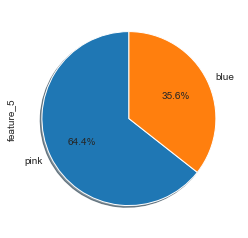

In [442]:
#The pie chart shows that there are more Pinks than blues
data['feature_5'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

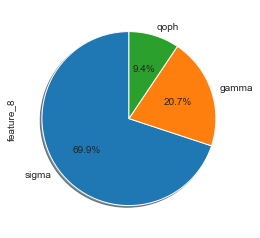

In [443]:
#The pie chart shows that there are more sigmas than gammas and qoph
data['feature_8'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)

mat.gca().set_aspect('equal')

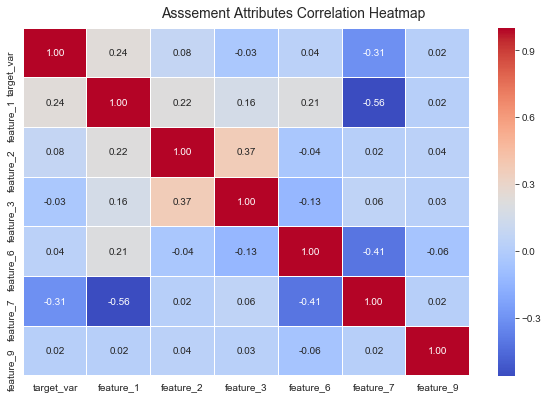

In [444]:
# I am showing data correlation or relationships amongst the features to check how relative they to each other
f, ax = mat.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Asssement Attributes Correlation Heatmap', fontsize=14)

In [445]:
# Building the model

In [446]:
##now converting feature 5 and feature_8 to binary
data['feature_5'] = pd.get_dummies(data['feature_5'], drop_first = True)
data_2 = pd.get_dummies(data['feature_8'],drop_first=True)

In [447]:
data.drop('feature_8',axis=1,inplace=True)

In [448]:
data = pd.concat([data,data_2],axis=1)

In [449]:
data.dropna(inplace=True)

In [450]:
data.head()

,target_var,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_9,qoph,sigma
0,1,211.3375,0,0,0,29.0000,1,112.877941,0,1
1,1,151.5500,2,1,1,0.9167,1,60.291423,0,1
2,0,151.5500,2,1,0,2.0000,1,143.794103,0,1
3,0,151.5500,2,1,1,30.0000,1,131.278352,0,1
4,0,151.5500,2,1,0,25.0000,1,204.415716,0,1


In [451]:
# I am going to use logistics regression to build my model since the values I am predicting are categorical

In [452]:
#Librarying for spliting the data into training data and testing data
from sklearn.model_selection import train_test_split

In [453]:
#spliting the data and assigning it into different variables
# I am going make my test size 50% training data and 50% testing data
X_train, X_test, y_train, y_test = train_test_split(data.drop('target_var', axis=1), 
                                                    data['target_var'], test_size=0.50)

In [454]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [455]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [456]:
predictions = logmodel.predict(X_test)

In [457]:
#Model Evaluation

In [458]:
# confusion_metrics
print(confusion_matrix(y_test,predictions))

[[351  53]
 [ 84 166]]


In [459]:
# classification report to check for model accuracy
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       404
          1       0.76      0.66      0.71       250

avg / total       0.79      0.79      0.79       654



In [460]:
#coefficients
logmodel.coef_

array([[ 3.21282582e-03, -9.34225702e-02, -1.86090717e-01,
        -2.39001107e+00, -6.96543259e-03, -5.51621725e-01,
         1.52636896e-03, -6.18587189e-01, -2.76185104e-01]])

In [461]:
#I use this value to check for accuracy of my models, most accurate model's value sits close to zero
log_loss(y_test,predictions)

7.235251903312789

In [462]:
# Summary

In [463]:
# In conclusion
# The there is little relativity between the features

# Techical Summary or Explanation
# 1. Looking at the correlation figure above we can clearly see that not many features relate to each other
# 2. Looking at the classication report we have an F1-score value of 79%, which shows the models accuracy on predictions
# 3. Lastly, the log_loss value is around 7 - which means poor relativity to features. Model with strong relativity should
#    have a log_loss of between 0 to 1.



In [464]:
# Non technical users.
# For non technical user summary I used the confussion matrix for evaluation
# From the confussion matrix we focus on two values False-Positive which means for every case in which 0 prediction was
# made when in fact it was a 1 in the original dataset, And False Negative which means for every prediction of 1 
# is made when in fact it was a 0 in the original data set.

In [465]:
# Non Technical User Summary
# 1. The cost for every 0 prediction made when the original value was 1 Amoounts to R 1 060 000 costs to company
# 2. The cost for every 1 prediction made when the original value was 0 Amoounts to R 840 000 costs to company